In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
# note: needs installation of sympy backend too
#%pip install sympy_plot_backends[all]
# conda install -c conda-forge sympy_plot_backends
from sympy import *
from spb import *
# better image resolution
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

### Excercise 1: Implement  y = x^2 + 3x^3 - x^4 in numpy

In [2]:
# create limits for input x and for plotting
x_min = -2
x_max = 2
x_domain_for_plot = np.arange(x_min,x_max,0.5)
x = np.linspace(x_min, x_max,1000)
# equation to plot
y = x**2 + 3*x**3 - x**4

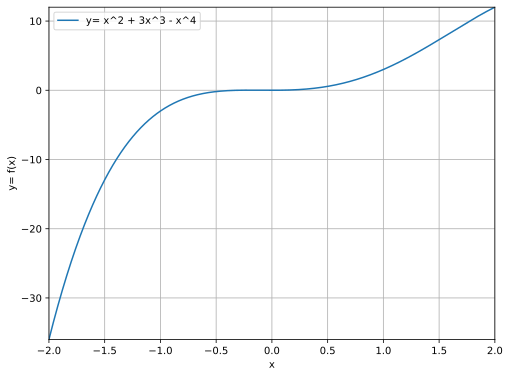

In [3]:
#Specify figure size
plt.figure(figsize=(8,6))
# specify plot line width
plt.plot(x,y,linestyle='solid')
# specify plot x and y labels
plt.xlabel('x')
plt.ylabel('y= f(x)')
# specify label and its location
plt.legend(['y= x^2 + 3x^3 - x^4'],loc='upper left')
# specify the limits for plotting
plt.xlim(x_min,x_max)
plt.ylim([np.min(y),np.max(y)])
plt.grid()

### Excercise 2: Implement  y = -beta^4 + 3*beta^3 + beta^2 in sympy

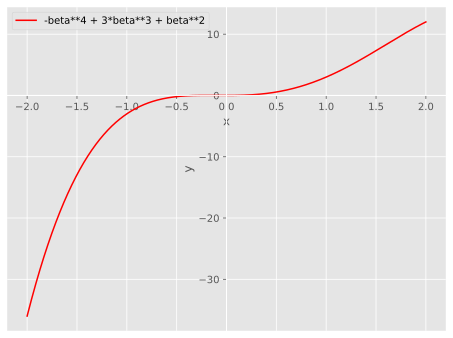

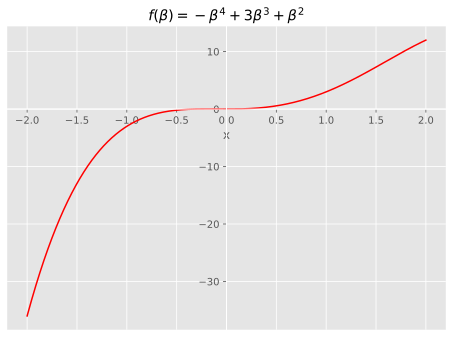

In [7]:
# create grid similar to subplot in matlab

# create symbolic input variable
sym_beta = sp.var('beta')
# Simpy notation convention: equation written from lowest to highest power of beta
sym_y = sym_beta**2 + 3*sym_beta**3 - sym_beta**4 
# plot directly with Sympy 
p1 = sp.plot(sym_y, (sym_beta, x_min, x_max), line_color='red', line_style='solid', \
        xlabel='x',ylabel='y',legend = True) # note legend automatically taken from equation

# alterantive way to plot with equation specified symbolically
# use grid through matplotlib
from matplotlib import style
style.use('ggplot')
# plot with params
p2 = sp.plot(sym_y, (sym_beta, x_min, x_max), line_color='red', line_style='solid', \
        xlabel='x',ylabel= None, grid=True,title = f'$f(\\beta)= {sp.latex(sym_y)}$')
#plotgrid(p1, p2)

### Decoding ` f'$f(\\beta)= {sp.latex(sym_y)}$') `
-  The `f` before the string indicates that it is an `f-string`, which allows for embedding expressions inside curly braces {} that will be evaluated at runtime.
-  `\\beta` is used to represent the Greek letter beta in LaTeX format
-  `$` is used to denote the start and end of a LaTeX
-  `{sp.latex(sym_y)}` This is an embedded expression within the f-string. It calls the sp.latex function from the SymPy library, which converts the symbolic expression sym_y into its LaTeX string representation.
-  The f-string evaluates the expression sp.latex(sym_y) and inserts its result into the string at the position of the curly braces.For example, if sym_y is `beta**2 + 3*beta**3 - beta**4`, sp.latex(sym_y) would return the LaTeX string representation of this expression, which might look like `\beta^{2} + 3 \beta^{3} - \beta^{4}.`

### Exercise 3:converting from sympy expression to  numpy expression : Steps
- create function that maps from sympy to numpy: `fx = sp.lambdify(sympy_ip_var,sympy_op_var) `
-  Evaluate the function : `numpy op = fx(numpy_ip)`
-  Note: `fx = sp.lambdify(sympy_ip_var,sympy_op_var,modules=['numpy'] ` can be used for numpy, ternsorflow etc

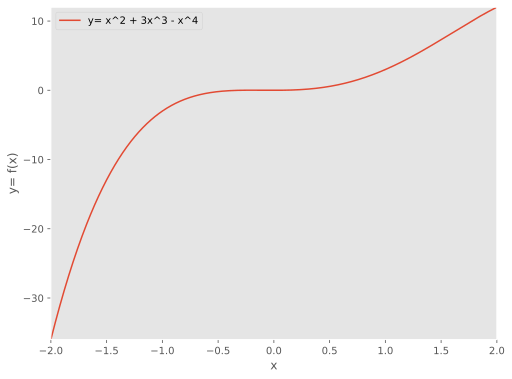

In [10]:
fx = sp.lambdify(sym_beta, sym_y, modules=['numpy'])
yy = fx(x)
#Specify figure size
plt.figure(figsize=(8,6))
# specify plot line width
plt.plot(x,yy,linestyle='solid')
# specify plot x and y labels
plt.xlabel('x')
plt.ylabel('y= f(x)')
# specify label and its location
plt.legend(['y= x^2 + 3x^3 - x^4'],loc='upper left')
# specify the limits for plotting
plt.xlim(x_min,x_max)
plt.ylim([np.min(y),np.max(y)])
plt.grid()